In [ ]:
!pip install gdown -q


In [ ]:
!gdown http://nlp.stanford.edu/data/glove.6B.zip -O glove.6B.zip -q

In [ ]:
!unzip /content/glove.6B.zip

Archive:  /content/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
from keras.datasets import reuters
from keras import preprocessing, Sequential
from keras.layers import Flatten, Dense, Embedding , LSTM
from keras.utils import to_categorical
import numpy as np
from keras.preprocessing.sequence import  pad_sequences
from keras.preprocessing.text import Tokenizer
import os

In [ ]:
max_features = 10000
maxlen = 100
embed_dim = 100

In [ ]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen=maxlen)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
def plot_results(history):
    # plot results
    import matplotlib.pyplot as plt

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs,acc,'r',label = 'Training acc')
    plt.plot(epochs,val_acc,'b',label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()
    plt.plot(epochs,loss,'r',label = 'Training loss')
    plt.plot(epochs,val_loss,'b',label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [ ]:
model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
model.summary()
history = model.fit(x_train,y_train, epochs=10,batch_size=32,validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 46)                1518      
Total params: 1,321,550
Trainable params: 1,321,550
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
225/225 [==============================] - 3s 11ms/step - loss: 0.1851 - acc: 0.3203 - val_loss: 0.0521 - val_acc: 0.5431
Epoch 2/10
225/225 [==============================] - 2s 9ms/step - loss: 0.0476 - acc: 0.6021 - val_loss: 0.

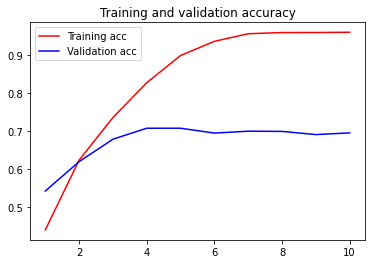

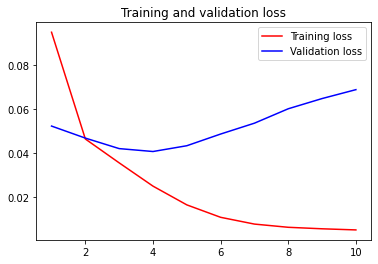

In [ ]:
plot_results(history)

In [ ]:
acc = model.evaluate(x_test,y_test)
print(f"Model has an accuracy of {acc[1]}")

71/71 [==============================] - 0s 2ms/step - loss: 0.0689 - acc: 0.6919
Model has an accuracy of 0.6918966770172119


In [ ]:
glove_dir = "/content/"
embeddings_index = {}

f = open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embeddings_index[word] = coefs
f.close()
print("Found %s words vectors." %len(embeddings_index))


Found 400000 words vectors.


In [ ]:
embedding_matrix = np.zeros((max_features,embed_dim))
word_index = reuters.get_word_index()

for word,i in word_index.items():
    if i < max_features:
        embeddings_vector = embeddings_index.get(word)
        if embeddings_vector is not None:
            embedding_matrix[i] = embeddings_vector

In [ ]:
def model(train):
  model = Sequential()
  model.add(Embedding(max_features,embed_dim,input_length=maxlen))
  model.add(Flatten())
  model.add(Dense(32,activation='relu'))
  model.add(Dense(46,activation='softmax'))

  # load embedding matrix and freez embedding layer weights
  model.layers[0].set_weights([embedding_matrix])
  if not train:
    model.layers[0].trainable = False
  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
  model.summary()
  return model

In [ ]:
model1 = model(False)
history = model1.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_7 (Dense)              (None, 46)                1518      
Total params: 1,321,550
Trainable params: 321,550
Non-trainable params: 1,000,000
_________________________________________________________________
Epoch 1/10
225/225 [==============================] - 2s 6ms/step - loss: 0.2163 - acc: 0.3030 - val_loss: 0.0626 - val_acc: 0.4758
Epoch 2/10
225/225 [==============================] - 1s 5ms/step - loss: 0.0538 - acc: 0.5432 - val_los

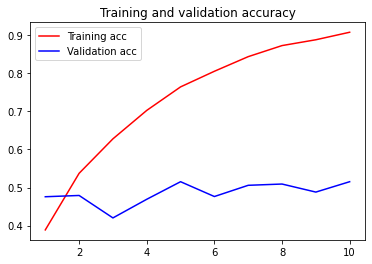

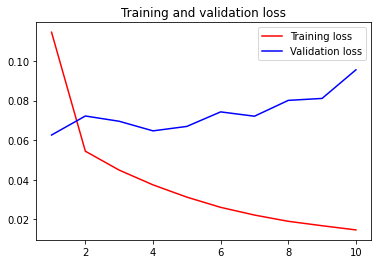

In [ ]:
plot_results(history)

In [ ]:
model2 = model(True)
history = model2.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_9 (Dense)              (None, 46)                1518      
Total params: 1,321,550
Trainable params: 1,321,550
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
225/225 [==============================] - 3s 10ms/step - loss: 0.2520 - acc: 0.2416 - val_loss: 0.0611 - val_acc: 0.4853
Epoch 2/10
225/225 [==============================] - 2s 9ms/step - loss: 0.0509 - acc: 0.5791 - val_loss: 0.

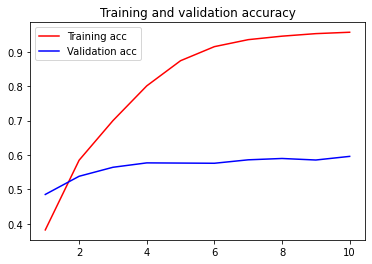

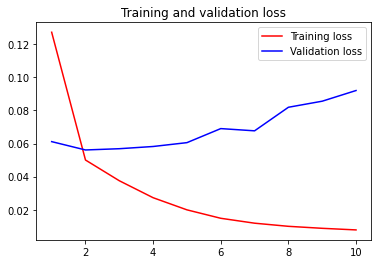

In [ ]:
plot_results(history)

In [ ]:
acc1 = model1.evaluate(x_test,y_test)
acc2 = model2.evaluate(x_test,y_test)
print(f"Accuracy with frozen weights: {acc1[1]}")
print(f"Accuracy without frozen weights: {acc2[1]}")

71/71 [==============================] - 0s 2ms/step - loss: 0.0928 - acc: 0.5899
Accuracy with frozen weights: 0.5053428411483765
Accuracy without frozen weights: 0.589937686920166


In [ ]:
model3 = Sequential()
model3.add(Embedding(max_features,embed_dim, input_length=maxlen))

model3.add(LSTM(32,return_sequences = True))

model3.add(Flatten())
model3.add(Dense(46,activation='softmax'))
model3.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics = ['acc'])
model3.summary()
history = model3.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 100, 32)           17024     
_________________________________________________________________
flatten_5 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 46)                147246    
Total params: 1,164,270
Trainable params: 1,164,270
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
57/57 [==============================] - 6s 78ms/step - loss: 0.2038 - acc: 0.3280 - val_loss: 0.0632 - val_acc: 0.4407
Epoch 2/10
57/57 [==============================] - 4s 73ms/step - loss: 0.0598 - acc: 0.4938 - val_loss: 0.054

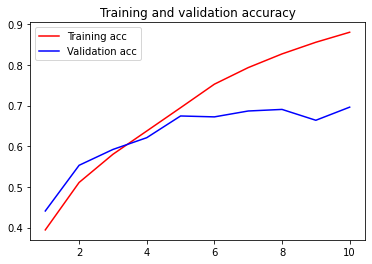

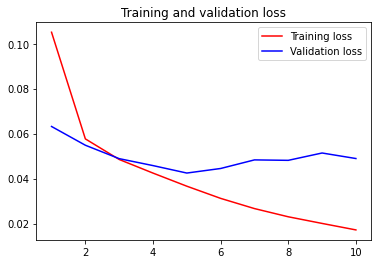

In [ ]:
plot_results(history)

In [ ]:
acc3 = model3.evaluate(x_test,y_test)
print(f"Accuracy with LSTM: {acc3[1]}")

71/71 [==============================] - 1s 9ms/step - loss: 0.0508 - acc: 0.6728
Accuracy with LSTM: 0.6727515459060669


In [ ]:
model4 = Sequential()
model4.add(Embedding(max_features,embed_dim, input_length=maxlen))

model4.add(LSTM(32,return_sequences=True))
model4.add(LSTM(32,return_sequences=True))

model4.add(Flatten())
model4.add(Dense(46,activation='softmax'))
model4.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics = ['acc'])
history = model4.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)



Epoch 1/10
57/57 [==============================] - 10s 127ms/step - loss: 2.3985 - acc: 0.3814 - val_loss: 1.6347 - val_acc: 0.5659
Epoch 2/10
57/57 [==============================] - 7s 125ms/step - loss: 1.5343 - acc: 0.5822 - val_loss: 1.5428 - val_acc: 0.5999
Epoch 3/10
57/57 [==============================] - 7s 123ms/step - loss: 1.3286 - acc: 0.6431 - val_loss: 1.6361 - val_acc: 0.5620
Epoch 4/10
57/57 [==============================] - 7s 124ms/step - loss: 1.0662 - acc: 0.7206 - val_loss: 1.4092 - val_acc: 0.6594
Epoch 5/10
57/57 [==============================] - 7s 123ms/step - loss: 0.8158 - acc: 0.7818 - val_loss: 1.4429 - val_acc: 0.6884
Epoch 6/10
57/57 [==============================] - 7s 124ms/step - loss: 0.6691 - acc: 0.8248 - val_loss: 1.7037 - val_acc: 0.6745
Epoch 7/10
57/57 [==============================] - 7s 127ms/step - loss: 0.5053 - acc: 0.8635 - val_loss: 1.9464 - val_acc: 0.6049
Epoch 8/10
57/57 [==============================] - 7s 126ms/step - loss: 0

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 32)           17024     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 32)           8320      
_________________________________________________________________
flatten_6 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 46)                147246    
Total params: 1,172,590
Trainable params: 1,172,590
Non-trainable params: 0
_________________________________________________________________


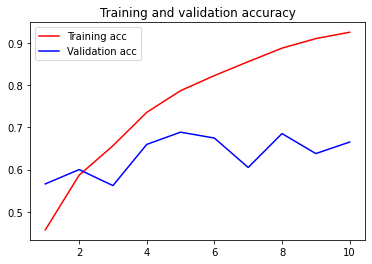

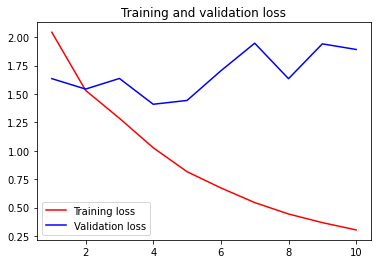

In [ ]:
model4.summary()
plot_results(history)

In [ ]:
acc4 = model4.evaluate(x_test,y_test)
print(f"Accuracy with 2 LSTM: {acc4[1]}")

71/71 [==============================] - 1s 14ms/step - loss: 2.0286 - acc: 0.6429
Accuracy with 2 LSTM: 0.642920732498169
